Results for dataset diabetes
Results for dataset  1
RSME =  0.7603389191910018
MAE =  0.6246237320672821
R2_score =  -1.0011682493572578


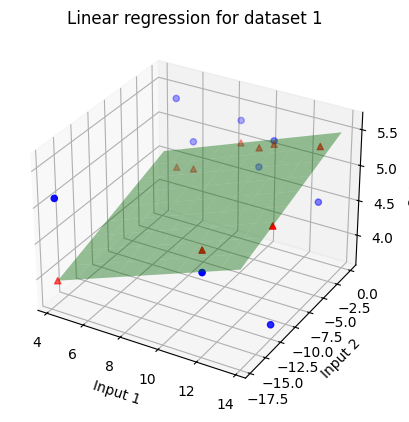

Results for dataset  2
RSME =  0.48265466481208696
MAE =  0.41407954920495854
R2_score =  0.0470001230982674


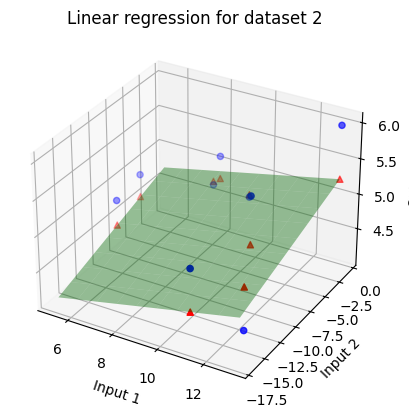

Results for dataset  3
RSME =  0.6204232520889089
MAE =  0.4505413422282265
R2_score =  0.43413927494847926


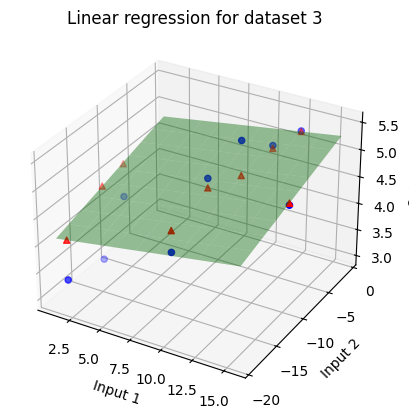

Results for dataset  4
RSME =  0.6791421385767847
MAE =  0.549037077786952
R2_score =  -0.0804897086750187


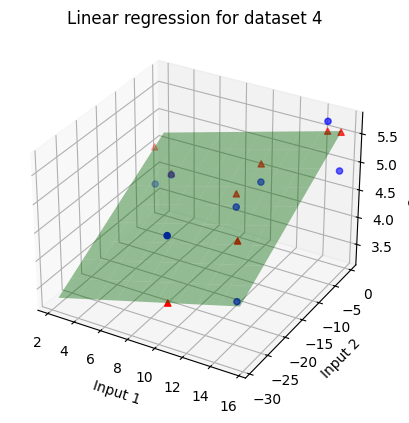

Results for dataset  5
RSME =  0.5949584922022169
MAE =  0.43210433537735554
R2_score =  0.4869918732702385


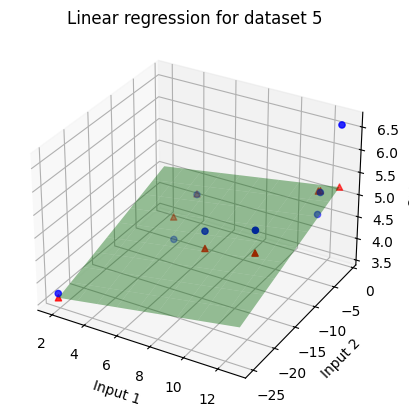

Results for dataset plastic
Results for dataset  1
RSME =  1.5425794054339943
MAE =  1.243053673902474
R2_score =  0.8033198879701773


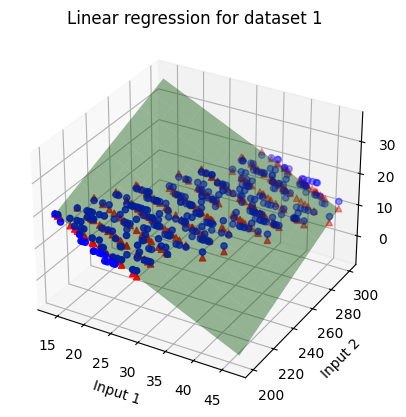

Results for dataset  2
RSME =  1.5348401459525667
MAE =  1.2190669002142642
R2_score =  0.8005564416983166


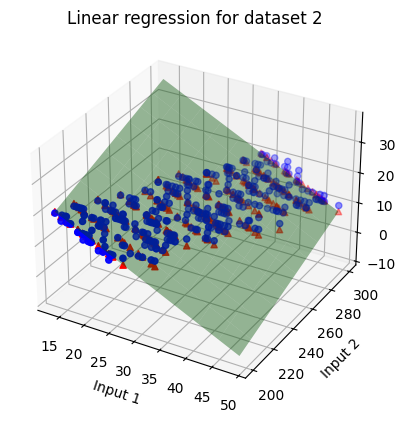

Results for dataset  3
RSME =  1.4803753432288833
MAE =  1.1957491763056454
R2_score =  0.8104999817532534


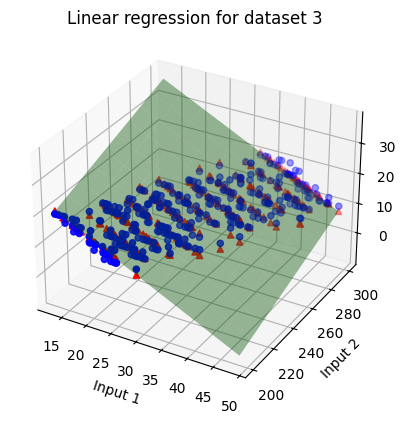

Results for dataset  4
RSME =  1.5847226843402187
MAE =  1.2698221966858123
R2_score =  0.7867691856227427


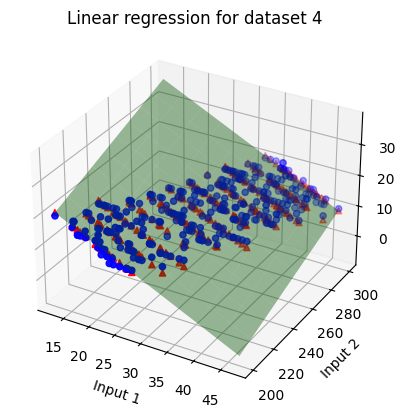

Results for dataset  5
RSME =  1.5098369476826574
MAE =  1.2346377421134784
R2_score =  0.7904744124191446


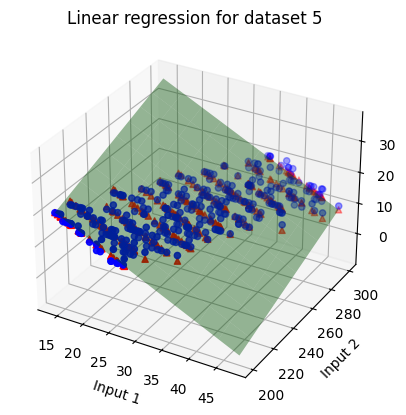

Avg RSME = 1.5304709053276642
Avg MAE = 1.2324659378443348
Avg R2_SCORE = 0.7983239818927269


In [5]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

#Importing dataset
datasets = ["diabetes","plastic"]
for j in datasets:
  rsmeList=[]
  maeList=[]
  r2List=[]
  print(f"Results for dataset {j}")
  for i in range(1,6):
    training = pd.read_csv(f"{j}-5-{i}tra.dat", header=None)
    testing = pd.read_csv(f"{j}-5-{i}tst.dat", header=None)

    X_train=training.iloc[: , :-1]
    Y_train=training.iloc[: , -1]
    

    X_test=testing.iloc[: , :-1]
    Y_test=testing.iloc[: , -1]

    regressor=LinearRegression()
    regressor.fit(X_train,Y_train)
    y_pred=regressor.predict(X_test)

    rsme=math.sqrt(mean_squared_error(Y_test,y_pred))
    mae=mean_absolute_error(Y_test,y_pred)
    r2=r2_score(Y_test,y_pred)

    rsmeList.append(rsme)
    maeList.append(mae)
    r2List.append(r2)

    print("Results for dataset ", i)
    print("RSME = " , rsme)
    print("MAE = " , mae)
    print("R2_score = " , r2)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], Y_test, c='blue', marker='o', label='Actual')
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, c='red', marker='^', label='Predicted')
    x_min, x_max = X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max()
    y_min, y_max = X_test.iloc[:, 1].min(), X_test.iloc[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
    zz = regressor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.plot_surface(xx, yy, zz, alpha=0.4, color = 'green', label='Regression')
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.set_zlabel('Output')
    ax.set_title(f'Linear regression for dataset {i}')
    plt.show() 

#Calculating averages of 5 datasets of each dataset
avg_rsme=sum(rsmeList)/len(rsmeList)
avg_mae=sum(maeList)/len(maeList)
avg_r2=sum(r2List)/len(r2List)
print(f"Avg RSME = {avg_rsme}")
print(f"Avg MAE = {avg_mae}")
print(f"Avg R2_SCORE = {avg_r2}")
